In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Методы численного интегрирования

## Задание 1

Рассмотрим интеграл $$I=\int_{-1}^5\frac{dx}{1+9x^2}.$$

### 1. Вычислите значение интеграла аналитически.

$$I=\int_{-1}^5\frac{dx}{1+9x^2}=\frac{1}{9}\int_{-1}^5\frac{dx}{1/9+x^2}=\frac{1}{3}\operatorname{arctg} 3x\big|_{-1}^5=0.917758$$

In [3]:
I_exact = (1/3) * (np.arctan(15) + np.arctan(3))
print("Аналитическое значение интеграла: {:.6f}".format(I_exact))

Аналитическое значение интеграла: 0.917758


### 2. Реализуйте методы численного интегрирования по формулам трапеций и Симпсона, или используйте готовые реализации из scipy.
Вычислите по этим формулам интеграл $I$ и оцените погрешности для разного числа интервалов. Определите скорость убывания погрешностей, сравните их с теоретическими значениями. Изобразите результаты сравнения на графике.

In [4]:
from scipy.integrate import simpson, trapezoid

def f(x):
    return 1 / (1 + 9 * x**2)

In [7]:
a, b = -1, 5

N_values = []  # число интервалов
error_trap = []
error_simp = []

for N in range(4, 257, 4):
    N_values.append(N)
    x = np.linspace(a, b, N+1)  # N+1 точка => N интервалов
    y = f(x)
    
    I_trap = trapezoid(y, x)
    error_trap.append(abs(I_exact - I_trap))
    
    I_simp = simpson(y, x=x)
    error_simp.append(abs(I_exact - I_simp))

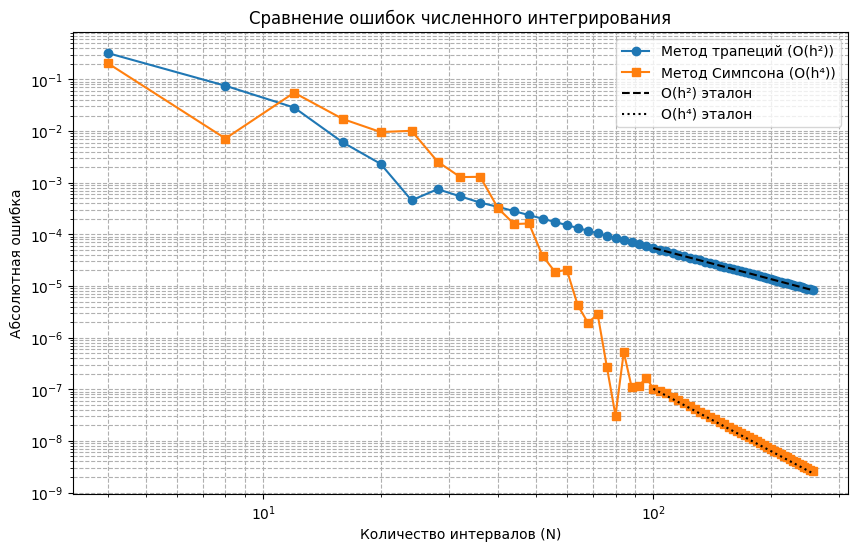

In [14]:
plt.figure(figsize=(10,6))
plt.loglog(N_values, error_trap, 'o-', label="Метод трапеций (О(h²))")
plt.loglog(N_values, error_simp, 's-', label="Метод Симпсона (О(h⁴))")
plt.xlabel("Количество интервалов (N)")
plt.ylabel("Абсолютная ошибка")
plt.title("Сравнение ошибок численного интегрирования")
plt.grid(True, which="both", ls="--")

# Fit from N=100
N_fit_start = 100
N_fit = np.array([N_fit_start, N_values[-1]], dtype=float)

# Calculate scaling factors using the error at N=100
index_N100 = np.where(N_values == N_fit_start)[0][0]  # Find the index where N=100
k_trap = error_trap[index_N100] / (N_fit_start**(-2))
k_simp = error_simp[index_N100] / (N_fit_start**(-4))

# Plot the fit lines
plt.loglog(N_fit, k_trap * (N_fit**(-2)), 'k--', label="О(h²) эталон")
plt.loglog(N_fit, k_simp * (N_fit**(-4)), 'k:', label="О(h⁴) эталон")

plt.legend()
plt.show()

### 3. Воспользуйтесь правилом Рунге для оценке длины шага по методу трапеций, необходимого для получения $I$ с абсолютной погрешностью менее $10^{-6}$. Сравните полученную оценку длины шага с фактической длиной шага, необходимой для достижения указанной точности.

### 4. (не обязательное) Повторите оценку шага по правилу Рунге для формулы Симпсона.

### 5. Для интервала $[-1,1]$ напишите программу, вычисляющую веса формул Ньютона-Котеса с равноотстоящими узлами. Проверьте выполнение свойств весов: нормировки и симметричности. Для какого числа узлов впервые появляются отрицательные веса?

## Задание 2.

Рассмотрим интеграл
$$I=\int_{-1}^5\frac{dx}{1+9x^2}.$$

### 1. Напишите программу, вычисляющую корни полиномов Лежандра (вам могут пригодиться функции `scipy.special.eval_legendre` и `scipy.optimize.root_scalar`).
Найдите веса соответствующей формулы Гаусса.
Сравните ваш результат с возвращаемым значением функции `scipy.special.roots_legendre`.

### 2. Напишите программу, вычисляющую $I$ с помощью полученной квадратурной формулы. Постройте график погрешности в зависимости от числа узлов.
Определите скорость убывания погрешности.

##  Задание 3.

Рассмотрим интеграл $$I=\int_0^\infty e^{-x}\cos\omega x\,dx.$$
Требуется вычислить интеграл с относительной точностью $10^{-3}$
для $\omega=100,200,500$.

### 1. Найдите конечный интервал интегрирования, достаточный для вычисления $I$ с заданной точностью.

### 2. Примение для вычисления $I$ составную формулу Филона (аналог трапеций).
Найдите необходимое для вычисления $I$ с заданной точностью число вычислений подинтегрального выражения.

### 3. (не обязательно) Найдите $I$ с заданной точностью с помощью формулы Гаусса. Сравните необходимое для этого число вычислений подинтегрального выражения с вычислениями по формуле Филона.

## Задание 4.

Формула билинейной интерполяции:
$$p(x_0+ph,y_0+qk)
=(1-p)(1-q)f_{0,0}+p(1-q)f_{1,0}+(1-p)q f_{0,1}+pq f_{1,1}.$$

### 1. Используйте формулу билинейной интерполяции для интерполяции функции $f(x,y)=\cos(x+xy)$ на квадрате $[0,\pi]\times[0,\pi]$.
Разделите каждую сторону квадрата на $N$ равных частей, и найдите зависимость погрешности билинейной интерполяции от $N$.

### 2. Повторите пункт 1, выбирая $N$ точек случайно. Сравните оценки погрешностей.

## Задание 5.

### 1. Найдите численно объем шара с радиусом $1$ в пространстве $\mathbb R^4$.
Для этого поместите шар в гиперкуб $[-1,1]^{\times 4}$ и вычислите интеграл от функции
$$
\chi(x)=\begin{cases}
1,& |x|\leq 1,\\
0,& |x|>1.
\end{cases}
$$
Найдите интеграл численно, используя произведение составных формул трапеций по каждой из координат. Постройте график зависимости погрешности от общего числа точек.

## Задание 6.

Рассмотрим интеграл $I$ от функции
$$
f(x)=\cos\left(\sum_{n=1}^4 n\cdot x_n^2\right)
$$
по гиперкубу $[0,1]^{\times 4}$.

### 1. Найдите интеграл $I$ численно через произведение составных формул трапеций по каждой из координат.

### 2. Найдите интеграл $I$ численно через произведение составных формул Симпсона по каждой из координат.

### 3. (не обязательно) Найдите интеграл $I$ сведением кратного интеграла к произведению одномерных и их вычислению с малой погрешностью.

# Указания.

В библиотеке `scipy` содержится функция для вычисления весов квадратурных формул
`scipy.integrate.newton_cotes`.
К сожалению, в настоящий момент (версия `scipy` 1.5.4) в этой функции содержатся ошибки.
Далее приводится альтернативная реализация вычисления весов, которую можно использоваться для вычисления весов метода Гаусса.

Согласно [формулам Ньютона-Котеса](https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas),
веса $w_k$ в квадратурной формуле:
$$
\int_a^b f(x)dx\approx \sum_{k=1}^N w_k f(x_k),
$$
равны интегралу по заданному промежутку от многочленов Лагранжа:
$$
w_k=\int_a^b l_k(x)dx,
$$
где $l_k$ суть многочлены степени $N-1$, удовлетворяющие условиям:
$$
l_k(x_j)=\begin{cases}1, & k=j,\\0, &k\neq j.\end{cases}
$$
Хотя для $l_k$ известна аналитическая формула (которую вы можете использовать для интегрирования,
например, используя пакет символьных вычислений [`sympy`](https://www.sympy.org/)):
$$
l_k(x)=\frac{\prod_{j\neq k}(x-x_j)}{\prod_{j\neq k}(x_k-x_j)},
$$
для практического счета гораздо удобнее воспользоваться переходом к мономиальному базису.
Пусть многочлены Лагранжа раскладываются по одночленам следующим образом:
$$
l_k(x)=\sum_{n=0}^{N-1}L_{k,n} x^n.
$$
В этом базисе интеграл считается тривиально:
$$
w_k
=\int_a^b l_k(x)dx
=\sum_{n=0}^{N-1}L_{k,n} \int_a^b x^n dx
=\sum_{n=0}^{N-1}L_{k,n} \frac{b^{n+1}-a^{n+1}}{n+1}.
$$
Таким образом, задача нахождения весов сводится к вычислению матрицы $L=(L_{k,n})_{kn}$.
Используя известные значения многочленов в узлах интегрирования, получаем систему на $L_{k,n}$:
$$
1=l_k(x_k)=\sum_{n=0}^{N-1}L_{k,n} x^n_k,\quad
0=l_k(x_j)=\sum_{n=0}^{N-1}L_{k,n} x^n_j.
$$
Или в матричном виде:
$$
I_N = L W,\quad W=(x^n_j)_{n,j}
$$
где $I_N$ -- единичная матрица, $W$ -- матрица [Вандермонда](https://en.wikipedia.org/wiki/Vandermonde_matrix).
Таким образом преобразование $L$ может быть найдено обращением матрицы $W$: $L=W^{-1}$.
Напомним, что матрица Вандермонда может быть плохо обусловлена, поэтому могут потребоваться дополнительные шаги для уточнения матрицы $L$, что однако не будем делать в нашей упрощенной реализации.


In [ ]:
def newton_cotes(xk, a=-1, b=1):
    """Возвращает вектор весов `wk` квадратурной формулы для интервала [`a`,`b`]
    с узлами интегрирования в точках `xk`."""
    xk=np.asarray(xk)
    N = np.arange(len(xk), dtype=np.float) # Массив степеней.
    W = xk[None,:]**N[:,None] # Матрица Вандермонда.
    L = np.linalg.inv(W) # Матрица перехода к базису из многочленов Лагранжа с узлами xk.
    N = N + 1 # Степени после интегрирования
    ix = (b**N-a**N)/N # Интегралы от одночленов.
    w = L@ix # Искомые веса.
    return w

# Протестируем функцию.
# Считаем веса для формулы прямоугольников:
print("Rectangle rule:", newton_cotes([0], a=0, b=1))
# Формула трапеций:
print("Trapezoidal rule:", newton_cotes([0, 1], a=0, b=1))
# Формула Симпсона:
print("Simpson rule:", newton_cotes([0, 0.5, 1], a=0, b=1)*6, "/6")
# Сумма коэффициентов дает 1.
import numpy.testing as npt
npt.assert_almost_equal(np.sum(newton_cotes(np.random.randn(7), a=0, b=1)), 1.)
# Точное значение интеграла на многочлене малой степени.
xk = np.random.rand(6)
a, b = -1, 2
def f(x):
    return 4*x**3-3*x**2+2*x-1
def antiderivative_f(x):
    return x**4-x**3+x**2-x
wk = newton_cotes(xk, a=a, b=b)
npt.assert_almost_equal( np.sum(wk*f(xk)), antiderivative_f(b)-antiderivative_f(a) )

Rectangle rule: [1.]
Trapezoidal rule: [0.5 0.5]
Simpson rule: [1. 4. 1.] /6
